In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy

In [9]:
from scipy import stats

In [10]:
%matplotlib inline

In [6]:
file_path = r"F:\Data_Science_Jupyter_Files\laptop_pricing_dataset_mod2.csv"

In [7]:
df = pd.read_csv(file_path, header=0)

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [11]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

(0.0, 3974.15)

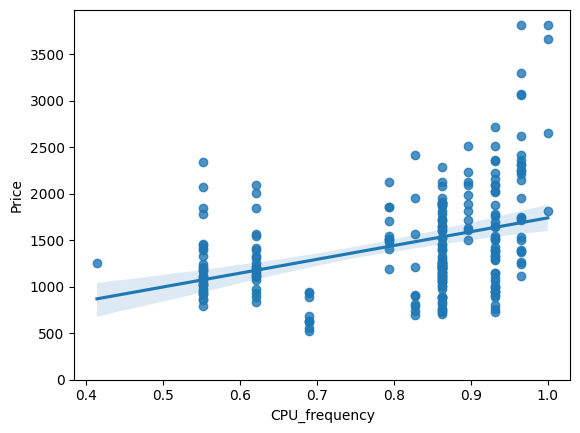

In [13]:
# CPU_frequency plot
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

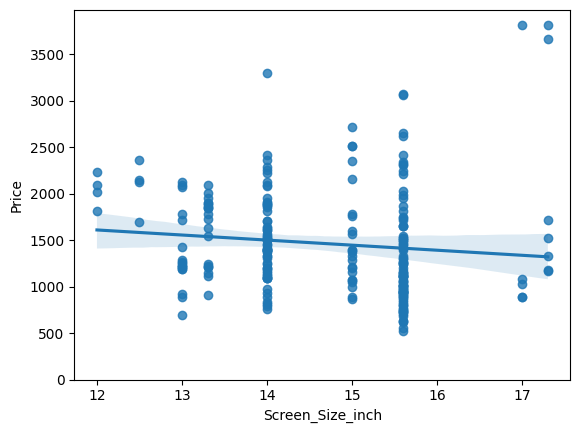

In [14]:
# Screen_Size_inch plot
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

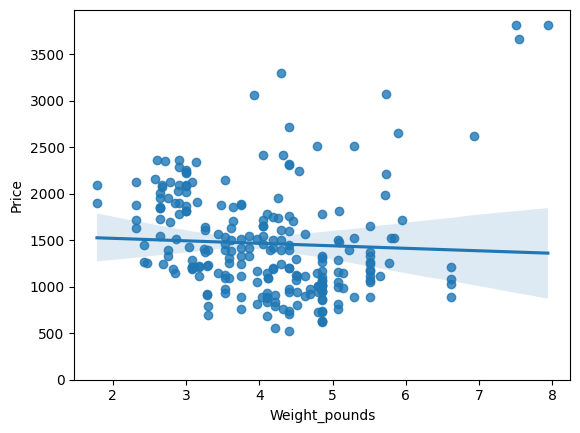

In [15]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [16]:
df[["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds
CPU_frequency,1.000000,-0.000948,0.066522
Screen_Size_inch,-0.000948,1.000000,0.797534
Weight_pounds,0.066522,0.797534,1.000000


In [22]:
df[["CPU_frequency","Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


In [23]:
df[["Screen_Size_inch","Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


In [24]:
df[["Weight_pounds","Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


In [19]:
for param in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    print(f"Correlation of Price and {param} is",df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='Category', ylabel='Price'>

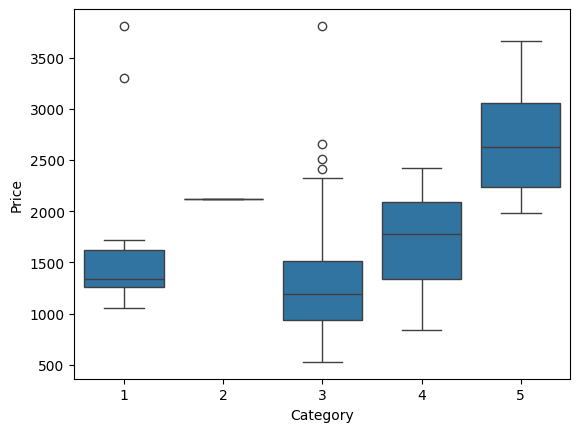

In [25]:
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

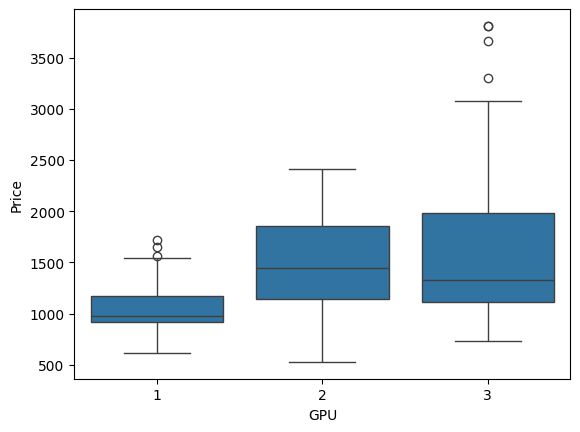

In [26]:
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

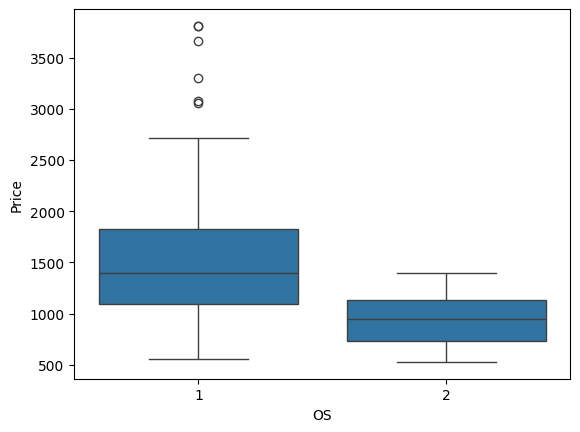

In [27]:
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

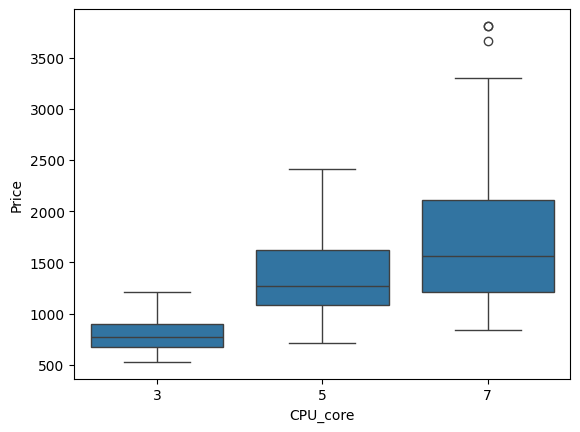

In [28]:
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

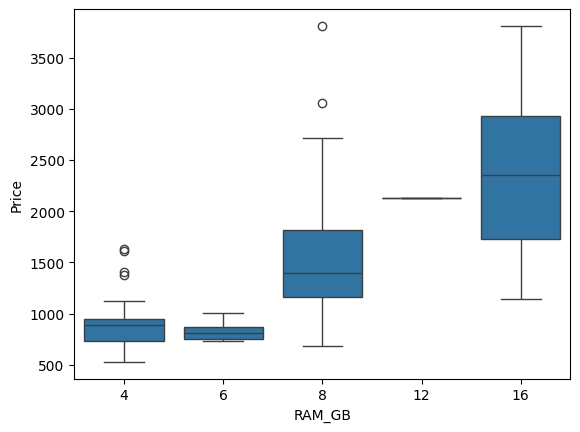

In [29]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

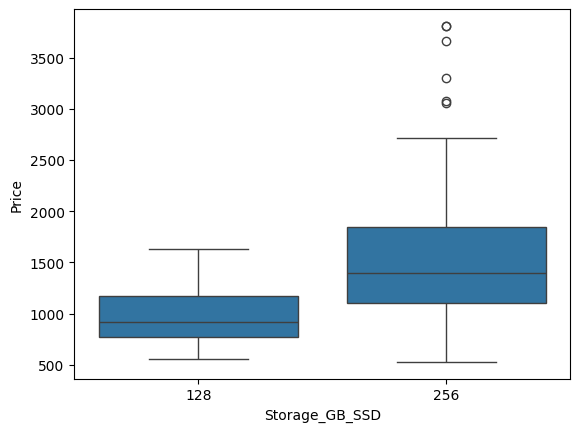

In [30]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [31]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

In [33]:
df_group1 = df[["GPU", "CPU_core", "Price"]]
df_grouping1 = df_group1.groupby(["GPU", "CPU_core"], as_index=False).mean()
df_grouping1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [35]:
df_pivot1 = df_grouping1.pivot(index="GPU", columns="CPU_core")
df_pivot1

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

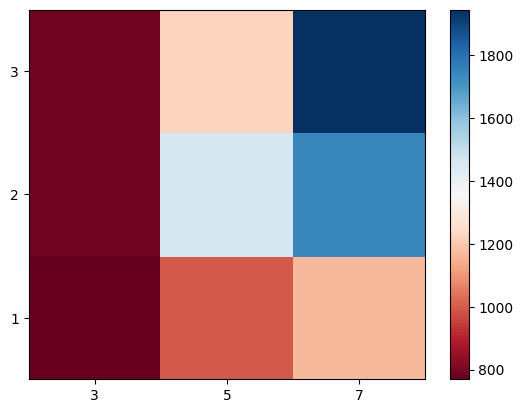

In [36]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot1,cmap="RdBu")

#Label Names
row_labels = df_pivot1.columns.levels[1]
col_labels = df_pivot1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

In [40]:
#Pearson Correlation and p-values
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df["Price"])
    print(param)
    print("The pearson correlation coefficient for", param, "is", pearson_coef, "with pearson value of", p_value)

RAM_GB
The pearson correlation coefficient for RAM_GB is 0.5492972971857841 with pearson value of 3.681560628842973e-20
CPU_frequency
The pearson correlation coefficient for CPU_frequency is 0.36666555892588615 with pearson value of 5.502463350713219e-09
Storage_GB_SSD
The pearson correlation coefficient for Storage_GB_SSD is 0.24342075521810302 with pearson value of 0.00014898923191723976
Screen_Size_inch
The pearson correlation coefficient for Screen_Size_inch is -0.11064420817118273 with pearson value of 0.0885339784683062
Weight_pounds
The pearson correlation coefficient for Weight_pounds is -0.05031225837751551 with pearson value of 0.43976938534338894
CPU_core
The pearson correlation coefficient for CPU_core is 0.4593977773355115 with pearson value of 7.912950127009359e-14
OS
The pearson correlation coefficient for OS is -0.22172980114827384 with pearson value of 0.000569664255924674
GPU
The pearson correlation coefficient for GPU is 0.28829819888814273 with pearson value of 6.16